# Principal Components Analysis

El análisis de componentes principales (PCA) es una técnica de reducción de dimensionalidad lineal. Intenta preservar la información que tiende a conservar la mayor variación de los datos y elimina las partes no esenciales, es decir, con menos variación.

PCA es que es una técnica no supervisada porque es capaz de agrupar los puntos de datos similares en función de la correlación de características (features/variables) entre ellos sin ninguna supervisión.

## Aplicaciones de PCA:

- Visualización de grandes volúmenes de datos. PCA es útil para descubrir cómo se correlacionan las variables o para comprender la distribución de algunas variables. Cuando existe una gran cantidad de variables o features a lo largo de las cuales se distribuyen los datos, la visualización puede ser un desafío y casi imposible. Esto es posible gracias a que PCA proyecta los datos en una dimensión inferior, esto nos permite visualizar los datos en un espacio 2D o 3D a simple vista.


- Aceleración y reducción de costos de procesamiento de datos. Puesto que la idea principal de PCA es la reducción de dimensionalidad, el tiempo requerido para el análisis de los datos se reduce una vez que la dimensionalidad del dataset se ha reducido.


## Librería para calcular PCA


Scikit-learn o sklearn permite calcular la técnica de análisis de componentes principales.

Sklearn es una librería de código abierto para Python, que implementa un conjunto variado de algoritmos de Machine Learning, pre-procesamiento, referencias cruzadas y visualización usando una interfaz unificada.

Revisar una referencia rápida de Scikit-learn en [http://blog.leonelatencio.com/referencia-rapida-scikit-learn-de-python/]


## Cálculo de PCA


In [1]:
# Carga de librerías:

import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris # dataset de trabajo disponible en sklearn
%matplotlib inline
%precision 3
np.set_printoptions(precision=3) # determine the way floating point numbers, arrays and other NumPy objects are displayed.
import pylab as pl

### a. Carga del dataset de trabajo: Iris dataset

UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/Iris


El dataset Iris contiene mediciones de 150 flores de iris de tres especies diferentes.

Las tres clases del conjunto de datos de Iris son:

- Iris-setosa (n=50)
- Iris-versicolor (n=50)
- Iris-virginica (n=50)


Y las cuatro características o features del conjunto de datos de Iris son:

- sepal (sépalo) length (cm)
- sepal (sépalo) width (cm)
- petal (pépalo) length (cm)
- petal (pépalo) width (cm)

In [2]:
iris = load_iris() # carga del dataset
iris_df = pd.DataFrame(iris.data,columns=[iris.feature_names])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
X = iris.data # cargar datos en X
print(X)
X.shape

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

(150, 4)

### b. Pre-procesamiento o transformación de datos

Dado que PCA produce un subespacio de características que maximiza la varianza a lo largo de los ejes, es necesario estandarizar (o escalar) los datos, especialmente, si se utilizan diferentes escalas.

Aunque todas los features de Iris están en centímetros, se sugiere aplicar la transformación de los datos de tal manera que los datos estén en una escala unitaria (media = 0 y varianza = 1), lo cual es un requisito para el rendimiento óptimo de muchos algoritmos de aprendizaje automático.

In [5]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[0:5])

[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]


### c.1 Cálculo paso a paso

In [6]:

# Cálculo de la matriz de covarianza:

X_covariance_matrix = np.cov(X_std.T)  # Matriz de covarianza de la traspuesta
print('Covarianza matrix \n%s' %X_covariance_matrix)

eig_vals, eig_vecs = np.linalg.eig(X_covariance_matrix)
print(40*"-")
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Covarianza matrix 
[[ 1.007 -0.118  0.878  0.823]
 [-0.118  1.007 -0.431 -0.369]
 [ 0.878 -0.431  1.007  0.969]
 [ 0.823 -0.369  0.969  1.007]]
----------------------------------------
Eigenvectors 
[[ 0.521 -0.377 -0.72   0.261]
 [-0.269 -0.923  0.244 -0.124]
 [ 0.58  -0.024  0.142 -0.801]
 [ 0.565 -0.067  0.634  0.524]]

Eigenvalues 
[2.938 0.92  0.148 0.021]


In [7]:
# Crear una lista of tuplas (eigenvalue, eigenvector):

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs

[(2.9380850501999927, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624892, array([-0.377, -0.923, -0.024, -0.067])),
 (0.1477418210449476, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.020853862176462064, array([ 0.261, -0.124, -0.801,  0.524]))]

In [8]:
# Ordenar las tuplas (eigenvalue, eigenvector) tuples desde el valor más alto al más bajo:
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualmente confirmar que la lista ha quedado ordenada
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9380850501999927
0.9201649041624892
0.1477418210449476
0.020853862176462064


In [9]:
# Determinar cuál es la varianza que captura cada componente:

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(40 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [72.96244541329983, 22.850761786701817, 3.668921889282866, 0.5178709107154746]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 72.962  95.813  99.482 100.   ]


La matriz anterior muestra que la mayor parte de la varianza (72,77%) se puede explicar solo por el primer componente principal. El segundo componente principal todavía explica algo de información (23,03%), mientras que el tercer y cuarto componentes principales se pueden eliminar de forma segura sin perder mucha información. Juntos, los dos primeros componentes principales explican el 95,8% de la variación de la información de todo el dataset.


In [10]:
print("All Eigen Values along with Eigen Vectors")
pprint.pprint(eig_pairs)
print(40 * '-')
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1))) # Stack arrays in sequence horizontally (column wise).

print('Matrix W:\n', matrix_w)

All Eigen Values along with Eigen Vectors
[(2.9380850501999927, array([ 0.521, -0.269,  0.58 ,  0.565])),
 (0.9201649041624892, array([-0.377, -0.923, -0.024, -0.067])),
 (0.1477418210449476, array([-0.72 ,  0.244,  0.142,  0.634])),
 (0.020853862176462064, array([ 0.261, -0.124, -0.801,  0.524]))]
----------------------------------------
Matrix W:
 [[ 0.521 -0.377]
 [-0.269 -0.923]
 [ 0.58  -0.024]
 [ 0.565 -0.067]]


In [11]:
Y = X_std.dot(matrix_w)  # Dot product of two arrays
print(Y[0:5])

[[-2.265 -0.48 ]
 [-2.081  0.674]
 [-2.364  0.342]
 [-2.299  0.597]
 [-2.39  -0.647]]


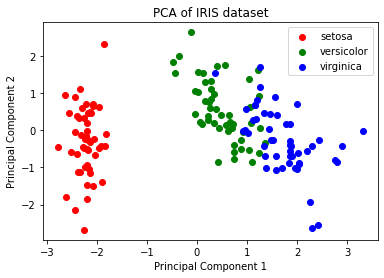

In [12]:
# Plot 

pl.figure()
target_names = iris.target_names
y = iris.target
for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
    pl.scatter(Y[y==i,0], Y[y==i,1], c=c, label=target_name)
pl.xlabel('Principal Component 1')
pl.ylabel('Principal Component 2')
pl.legend()
pl.title('PCA of IRIS dataset')
pl.show()

### c.2 Cálculo de PCA mediante sklearn

- Source:https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python


In [13]:
print(X[0:5]) # matriz original
print(40*'-')
print(X_std[0:5]) # matriz escalada

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
----------------------------------------
[[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]


Comprobación de que los datos normalizados tienen una media cercana a cero y una desviación estándar de uno.

In [14]:
np.mean(X_std),np.std(X_std)

(-1.4684549872375404e-15, 1.0)

Convirtir las características normalizadas a un formato tabular con la ayuda de DataFrame.

In [15]:
feat_cols = ['feature'+str(i) for i in range(X_std.shape[1])]; feat_cols

['feature0', 'feature1', 'feature2', 'feature3']

In [16]:
normalised_iris = pd.DataFrame(X_std,columns=feat_cols); normalised_iris.tail()

,feature0,feature1,feature2,feature3
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832
149,0.068662,-0.131979,0.762758,0.790671


Las próximas líneas de código proyectarán los datos de iris de 4 features a componentes principales bidimensionales.


Utilizamos la biblioteca sklearn para importar el módulo PCA y, en el método PCA, el cual recibe como parámetro el número de componentes principales a calcular (n_components = 2). 

Finalmente se llama a fit_transform para realizar la transformación de datos.

In [17]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=2)
c = pca_iris.fit_transform(X_std)

A continuación, creamos un DataFrame que tendrá los valores de los componentes principales para las 150 observaciones.

In [18]:
pc_DF = pd.DataFrame(data = c, columns = ['PC 1', 'PC 2']); pc_DF.tail()

,PC 1,PC 2
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254
149,0.960656,-0.024332


Una vez que se hayan calculado los PC, podemos encontrar la explained_variance_ratio. Esto explica la cantidad de información o varianza que tiene cada componente principal después de proyectar los datos a un subespacio de menor dimensión.

In [19]:
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

Explained variation per principal component: [0.73  0.229]


Explained variation per principal component: [0.44272026 0.18971182]

A partir del resultado anterior, podemos observar que el PC 1 contiene el 73% de la información, mientras que el PC 2 contiene el 23% de la información. Al proyectar los datos de 4 dimensiones a datos de dos dimensiones, se perdió solo un 5% de la información.

<Figure size 432x288 with 0 Axes>

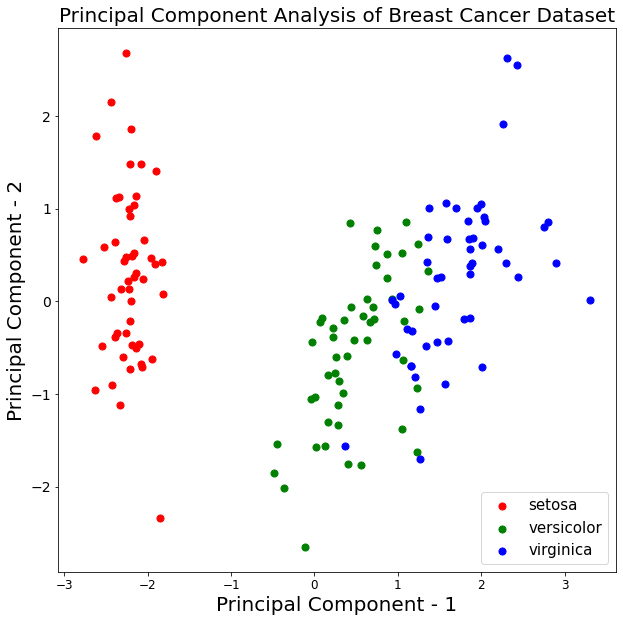

In [20]:
# Visualización:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
#targets = ['Benign', 'Malignant']
colors = ['r', 'g', 'b']
for yi, target, color in zip([0, 1, 2], target_names, colors):
    indicesToKeep = iris.target == yi
    plt.scatter(pc_DF.loc[indicesToKeep, 'PC 1']
               , pc_DF.loc[indicesToKeep, 'PC 2'], c = color, s = 50)

plt.legend(target_names,prop={'size': 15})

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [22]:
cancer_df = pd.DataFrame(cancer.data,columns=[cancer.feature_names])
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
X = cancer.data # cargar datos en X
print(X)
X.shape

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


(569, 30)

In [24]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std[0:5])
np.mean(X_std),np.std(X_std)

[[ 1.097e+00 -2.073e+00  1.270e+00  9.844e-01  1.568e+00  3.284e+00
   2.653e+00  2.532e+00  2.218e+00  2.256e+00  2.490e+00 -5.653e-01
   2.833e+00  2.488e+00 -2.140e-01  1.317e+00  7.240e-01  6.608e-01
   1.149e+00  9.071e-01  1.887e+00 -1.359e+00  2.304e+00  2.001e+00
   1.308e+00  2.617e+00  2.110e+00  2.296e+00  2.751e+00  1.937e+00]
 [ 1.830e+00 -3.536e-01  1.686e+00  1.909e+00 -8.270e-01 -4.871e-01
  -2.385e-02  5.481e-01  1.392e-03 -8.687e-01  4.993e-01 -8.762e-01
   2.633e-01  7.424e-01 -6.054e-01 -6.929e-01 -4.408e-01  2.602e-01
  -8.055e-01 -9.944e-02  1.806e+00 -3.692e-01  1.535e+00  1.890e+00
  -3.756e-01 -4.304e-01 -1.467e-01  1.087e+00 -2.439e-01  2.812e-01]
 [ 1.580e+00  4.562e-01  1.567e+00  1.559e+00  9.422e-01  1.053e+00
   1.363e+00  2.037e+00  9.397e-01 -3.980e-01  1.229e+00 -7.801e-01
   8.509e-01  1.181e+00 -2.970e-01  8.150e-01  2.131e-01  1.425e+00
   2.370e-01  2.936e-01  1.512e+00 -2.397e-02  1.347e+00  1.456e+00
   5.274e-01  1.083e+00  8.550e-01  1.955e+00 

(-6.118909323768877e-16, 1.0)

In [25]:
np.mean(X_std),np.std(X_std)

(-6.118909323768877e-16, 1.0)

In [26]:
feat_cols = ['feature'+str(i) for i in range(X_std.shape[1])]; feat_cols

['feature0',
 'feature1',
 'feature2',
 'feature3',
 'feature4',
 'feature5',
 'feature6',
 'feature7',
 'feature8',
 'feature9',
 'feature10',
 'feature11',
 'feature12',
 'feature13',
 'feature14',
 'feature15',
 'feature16',
 'feature17',
 'feature18',
 'feature19',
 'feature20',
 'feature21',
 'feature22',
 'feature23',
 'feature24',
 'feature25',
 'feature26',
 'feature27',
 'feature28',
 'feature29']

In [27]:
normalised_cancer = pd.DataFrame(X_std,columns=feat_cols); normalised_cancer.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [28]:
from sklearn.decomposition import PCA
pca_cancer = PCA(n_components=2)
c = pca_cancer.fit_transform(X_std)
print(c)

[[ 9.193  1.949]
 [ 2.388 -3.768]
 [ 5.734 -1.075]
 ...
 [ 1.256 -1.902]
 [10.375  1.672]
 [-5.475 -0.671]]


In [29]:
pc_DF = pd.DataFrame(data = c, columns = ['PC 1', 'PC 2']); pc_DF.tail()

,PC 1,PC 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


In [30]:
print('Explained variation per principal component: {}'.format(pca_cancer.explained_variance_ratio_))

Explained variation per principal component: [0.443 0.19 ]


<Figure size 432x288 with 0 Axes>

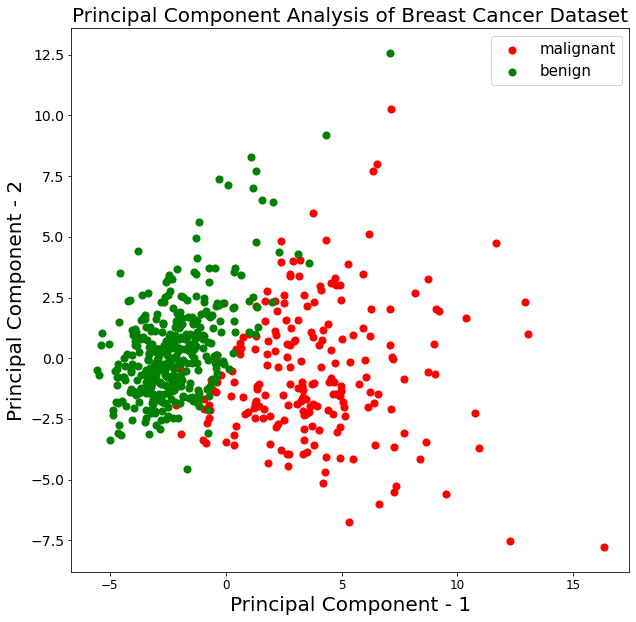

In [31]:
##
target_names = cancer.target_names
##
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for yi, target, color in zip([0, 1, 2], target_names, colors):
    indicesToKeep = cancer.target == yi
    plt.scatter(pc_DF.loc[indicesToKeep, 'PC 1']
               , pc_DF.loc[indicesToKeep, 'PC 2'], c = color, s = 50)

plt.legend(target_names,prop={'size': 15})